In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE

# 1. Model Training and Evaluation

## <u>Loading the Data</u>

### Loading Train Set

In [2]:
training_df = pd.read_csv("ClientScore (Training Data).csv")
training_df

,Score 1,Score 2,CreditWorthy
0,29,93,1
1,75,52,1
2,58,74,1
3,15,57,0
4,42,91,1
...,...,...,...
195,56,33,0
196,22,60,0
197,41,76,1
198,18,59,0


### Loading Test Set

In [3]:
testing_df = pd.read_csv("ClientScore (Testing Data).csv")
testing_df

,Score 1,Score 2,CreditWorthy
0,47,33,0
1,3,66,0
2,63,70,1
3,36,54,0
4,97,45,1
5,64,67,1
6,48,68,0
7,68,81,1
8,43,50,0
9,98,7,1


#### Test Set Generic Exploration

In [4]:
testing_df.CreditWorthy.value_counts()

0    32
1    18
Name: CreditWorthy, dtype: int64

In [5]:
testing_df.CreditWorthy.value_counts(normalize=True)

0    0.64
1    0.36
Name: CreditWorthy, dtype: float64

In [6]:
testing_df.corr()

,Score 1,Score 2,CreditWorthy
Score 1,1.000000,-0.011278,0.649761
Score 2,-0.011278,1.000000,0.415454
CreditWorthy,0.649761,0.415454,1.000000


In [7]:
testing_df.isna().sum()

Score 1         0
Score 2         0
CreditWorthy    0
dtype: int64

## <u>Training Data Exploration & Cleaning</u>

### Generic

In [8]:
training_df.dtypes

Score 1         int64
Score 2         int64
CreditWorthy    int64
dtype: object

In [9]:
training_df.isna().any()

Score 1         False
Score 2         False
CreditWorthy    False
dtype: bool

In [10]:
training_df.corr()
# No high multicollinearity

,Score 1,Score 2,CreditWorthy
Score 1,1.000000,0.029254,0.581018
Score 2,0.029254,1.000000,0.526486
CreditWorthy,0.581018,0.526486,1.000000


### Score 1

In [11]:
training_df['Score 1'].isna().sum()
# No NAN

0

In [12]:
training_df['Score 1'].describe()

count    200.000000
mean      50.545000
std       28.092954
min        1.000000
25%       27.000000
50%       53.000000
75%       75.000000
max      100.000000
Name: Score 1, dtype: float64

<AxesSubplot:ylabel='Frequency'>

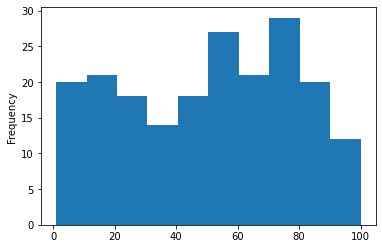

In [13]:
training_df['Score 1'].plot.hist(bins=10)

<AxesSubplot:>

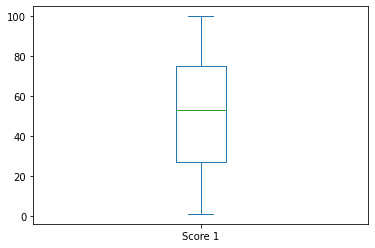

In [14]:
training_df['Score 1'].plot.box()

### Score 2

In [15]:
training_df['Score 2'].isna().sum()
# No NAN

0

In [16]:
training_df['Score 2'].describe()

count    200.000000
mean      48.470000
std       28.858851
min        1.000000
25%       22.750000
50%       50.500000
75%       73.000000
max      100.000000
Name: Score 2, dtype: float64

<AxesSubplot:ylabel='Frequency'>

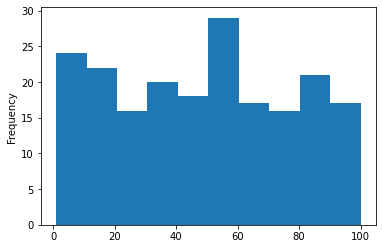

In [17]:
training_df['Score 2'].plot.hist(bins=10)

<AxesSubplot:>

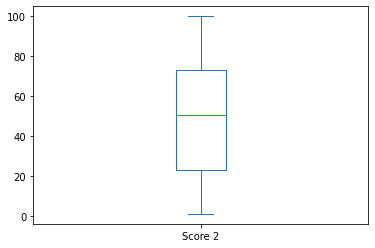

In [18]:
training_df['Score 2'].plot.box()

### Credit worthiness
- 1: credit worthy
- 0: Not credit worthy

In [19]:
training_df['CreditWorthy'].isna().sum()
# No NAN

0

In [20]:
training_df['CreditWorthy'].value_counts()

0    124
1     76
Name: CreditWorthy, dtype: int64

In [21]:
training_df['CreditWorthy'].value_counts(normalize=True)

0    0.62
1    0.38
Name: CreditWorthy, dtype: float64

### Score 1 and 2

In [22]:
# Low correlations between the 2 scores
training_df[['Score 1','Score 2']].corr()

,Score 1,Score 2
Score 1,1.000000,0.029254
Score 2,0.029254,1.000000


<AxesSubplot:xlabel='Score 1', ylabel='Score 2'>

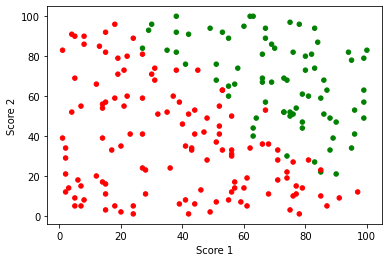

In [60]:
scatterplot_colour = ["red" if x==0 else "green" for x in training_df.CreditWorthy] 
training_df.plot.scatter('Score 1','Score 2',c=scatterplot_colour)

## <u>Train Test Split</u>

In [25]:
X_train = training_df[['Score 1','Score 2']]
Y_train = training_df.CreditWorthy

X_test = testing_df[['Score 1','Score 2']]
Y_test = testing_df.CreditWorthy

## <u> Oversampling</u>
To do oversampling as there is a class imbalance but only after train-test split so that "reality" is preserved  
However the oversampling is not critical as the imbalance is not severe

In [26]:
oversample = SMOTE(random_state=123)
X_train_oversampled, Y_train_oversampled = oversample.fit_resample(X_train, Y_train)

In [27]:
print("Trainset oversampled: \n",Y_train_oversampled.value_counts(normalize=False))

Trainset oversampled: 
 1    124
0    124
Name: CreditWorthy, dtype: int64


## <u>Logistic Regression </u>

### Assumptions specific to Logistic Regression:
1. Logistic Regression assumes that there is minimal or no multicollinearity among the independent variables.
2. Logistic Regression assumes the appropriate structure of the outcome variable. Binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.
3. Logistic Regression assumes the observations to be independent of each other.
4. Logistic Regression assumes a linear relationship between the independent variables and the logit of the dependent variable.
5. Logistic Regression assumes that the sample size of the dataset is large enough to draw valid conclusion from the fitted logistic regression model.
6. Logistic Regression assumes that there is no extreme outlier in the continuous indepedent variables.

### Building model:

In [28]:
log_reg_model = LogisticRegression()

In [29]:
# log_reg_model.fit(X_train,Y_train)
log_reg_model.fit(X_train_oversampled, Y_train_oversampled)

LogisticRegression()

In [30]:
log_reg_model.predict(X_train_oversampled)

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

### Train Set Prediction:

In [31]:
# pred = log_reg_model.predict(X_train)
# cm=confusion_matrix(Y_train, pred)
# print(cm)
pred = log_reg_model.predict(X_train_oversampled)
cm=confusion_matrix(Y_train_oversampled, pred)
print(cm)

[[117   7]
 [  8 116]]


In [32]:
accuracy=accuracy_score(Y_train_oversampled, pred)
precision=precision_score(Y_train_oversampled, pred)
recall=recall_score(Y_train_oversampled, pred)

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)

Accuracy:  0.9395161290322581
Precision:  0.943089430894309
Recall:  0.9354838709677419
Roc_auc:  0.9395161290322582


### Test Set Prediction:

In [33]:
pred=log_reg_model.predict(X_test)
cm=confusion_matrix(Y_test, pred)
print(cm)

[[30  2]
 [ 3 15]]


In [34]:
accuracy=accuracy_score(Y_test, pred)
precision=precision_score(Y_test, pred)
recall=recall_score(Y_test, pred)

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)

Accuracy:  0.9
Precision:  0.8823529411764706
Recall:  0.8333333333333334
Roc_auc:  0.8854166666666667


### Hyperparameter Tuning:
Not required for logistic regression as it does not really have any critical hyperparameters to tune  
Logistic regression is not likely to overfit

# 2. Boundary of the logistic regression in a scatter plot

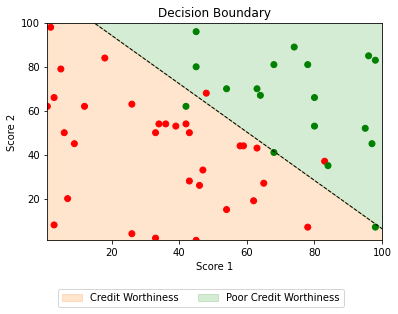

In [54]:
# import numpy as np
import matplotlib.pyplot as plt

# Retrieve the model parameters.
b = log_reg_model.intercept_[0]
w1, w2 = log_reg_model.coef_.T

# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = 1, 100
ymin, ymax = 1, 100
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')#,label='Decision Boundary')

credit_worthiness_area = plt.fill_between(xd, yd, ymin, color='tab:orange', alpha=0.2, label= 'Credit Worthiness')
poor_credit_worthiness_area = plt.fill_between(xd, yd, ymax, color='tab:green', alpha=0.2, label='Poor Credit Worthiness')

color = ["red" if x==0 else "green" for x in Y_test] 
scatter_actual = plt.scatter(X_test["Score 1"], X_test["Score 2"], c = color)

# X & Y Label
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel('Score 2')
plt.xlabel('Score 1')

# Legend
plt.legend(handles=[credit_worthiness_area,poor_credit_worthiness_area], bbox_to_anchor=(0.9, -0.2), ncol=2)

# Title
plt.title("Decision Boundary")
plt.show()

# 3. Dealing with Imbalanced Dataset

To do oversampling as there is a class imbalance but only after train-test split so that "reality" is preserved  
However the oversampling is not critical as the imbalance is not severe

# 4. Evaluation Metric Approach

Positive ==> Credit Worthy  
Negative ==> Not Credit Worthy  

FP: Cost of wrongly predicting a credit worthy customer as not credit worthy ==> Potential deterioration of customer r/s  
FN: Cost of wrongly predicting a not credit worthy customer as credit worthy ==> Potential Default  

Cost of FN > Cost of FP  

Therefore should evaluate on based on Recall

# 5. Bias-variance trade-off

**Bias:**
- Difference between the average prediction of our model and the correct value which we are trying to predict. 
- Oversimplifies the model.
- Leads to high error on training (Underfitting).

**Variance:**
- Tells us spread of our data.
- Does not generalize on the data which it hasn’t seen before (Overfitting).
- High variance models perform very well on training data but has high error rates on test data.

**Irreducible error:**
- Error that we can not remove with our model, or with any model

**Bias Variance Tradeoff:**
- Model with few parameters: high bias & low variance
- Model with large number of parameters: high variance & low bias.
- Need to find the right/good balance without overfitting and underfitting the data.

**Total Error = Bias^2 + Variance + Irreducible Error**

For this logistic model, we only have 2 parameters and hence the model will suffer more from Bias Error.  
Performance of model would improve with more (relevant) parameters/features.